In [11]:
#load data

import pandas as pd

file_path = r'C:\Users\amine\Desktop\AFC_project\Billionaires_Statistics_Dataset.csv'
data = pd.read_csv(file_path)

# Afficher les premières lignes pour vérifier
print(data.head())
print(data.info())
print(data.describe())


   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...     

In [12]:
# Creating a list of columns to keep
columns_to_keep = ["personName", "countryOfCitizenship", "selfMade","industries"]


#Dropping the columns not in the list
new_data = data[columns_to_keep]

new_data


,personName,countryOfCitizenship,selfMade,industries
0,Bernard Arnault & family,France,False,Fashion & Retail
1,Elon Musk,United States,True,Automotive
2,Jeff Bezos,United States,True,Technology
3,Larry Ellison,United States,True,Technology
4,Warren Buffett,United States,True,Finance & Investments
...,...,...,...,...
2635,Yu Rong,China,True,Healthcare
2636,"Richard Yuengling, Jr.",United States,False,Food & Beverage
2637,Zhang Gongyun,China,True,Manufacturing
2638,Zhang Guiping & family,China,True,Real Estate


In [13]:
print(new_data.head())
print(new_data.info())
print(new_data.describe())

                 personName countryOfCitizenship  selfMade  \
0  Bernard Arnault & family               France     False   
1                 Elon Musk        United States      True   
2                Jeff Bezos        United States      True   
3             Larry Ellison        United States      True   
4            Warren Buffett        United States      True   

              industries  
0       Fashion & Retail  
1             Automotive  
2             Technology  
3             Technology  
4  Finance & Investments  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   personName            2640 non-null   object
 1   countryOfCitizenship  2640 non-null   object
 2   selfMade              2640 non-null   bool  
 3   industries            2640 non-null   object
dtypes: bool(1), object(3)
memory usage: 64.6+ KB
None
    

In [14]:
# Enregistrer le nouveau DataFrame dans un nouveau fichier CSV
output_file_path = 'C:\\Users\\amine\\Desktop\\AFC_project\\Billionaires_Selected_Cols.csv'
new_data.to_csv(output_file_path, index=False)

print(f"Le nouveau DataFrame avec les colonnes sélectionnées a été enregistré dans {output_file_path}.")

Le nouveau DataFrame avec les colonnes sélectionnées a été enregistré dans C:\Users\amine\Desktop\AFC_project\Billionaires_Selected_Cols.csv.


In [15]:
#Filtrer les données pour inclure uniquement les milliardaires autodidactes
selfmade_df = new_data [new_data ["selfMade"].notnull()]

In [16]:
#Créer le tableau de contingence
contingency_table = pd.crosstab(index=selfmade_df["countryOfCitizenship"], columns=selfmade_df["industries"])

#Afficher le tableau de contingence
contingency_table

industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
Armenia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Australia,1,0,1,1,7,5,1,0,0,1,4,0,9,8,0,0,8,1
Austria,2,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0,1,5,1,10,11,2,2,1,0,5,2,1,6,0,1,2,2
United States,13,5,14,34,58,186,71,6,34,6,28,38,3,49,19,35,131,5
Venezuela,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Supprimer les lignes contenant uniquement des zéros
contingency_table_filtered = contingency_table.drop(contingency_table[contingency_table.sum(axis=1) == 0].index)

# Afficher le tableau de contingence filtré
contingency_table_filtered

industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
Armenia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Australia,1,0,1,1,7,5,1,0,0,1,4,0,9,8,0,0,8,1
Austria,2,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0,1,5,1,10,11,2,2,1,0,5,2,1,6,0,1,2,2
United States,13,5,14,34,58,186,71,6,34,6,28,38,3,49,19,35,131,5
Venezuela,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Calculer la somme de tous les éléments du tableau de contingence
N = contingency_table.values.sum()

# Calculer le tableau de probabilité en divisant chaque élément par la somme totale
probability_table = contingency_table / N
probability_table

industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,0.000379,0.000758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000379,0.000000
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.000379,0.000000,0.000379,0.000379,0.002652,0.001894,0.000379,0.000000,0.000000,0.000379,0.001515,0.000000,0.003409,0.003030,0.000000,0.000000,0.003030,0.000379
Austria,0.000758,0.000379,0.000379,0.000000,0.000379,0.000000,0.000379,0.000379,0.000000,0.000379,0.000379,0.000000,0.000000,0.000379,0.000000,0.000379,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000000,0.000379,0.001894,0.000379,0.003788,0.004167,0.000758,0.000758,0.000379,0.000000,0.001894,0.000758,0.000379,0.002273,0.000000,0.000379,0.000758,0.000758
United States,0.004924,0.001894,0.005303,0.012879,0.021970,0.070455,0.026894,0.002273,0.012879,0.002273,0.010606,0.014394,0.001136,0.018561,0.007197,0.013258,0.049621,0.001894
Venezuela,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
import numpy as np

# Calculer la matrice de probabilité
matrix_probability = probability_table.to_numpy()
matrix_probability


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00037879, ..., 0.        , 0.00037879,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00037879, 0.        , 0.00075758, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00037879]])

In [20]:
# Calcul de la matrice diagonale de ligne Dn
Dn = np.diag(matrix_probability.sum(axis=1))

# Affichage de la matrice diagonale Dn
print("Matrice diagonale Dn est:")
print(Dn)

trace_Dn = np.trace(Dn)
print("Trace de Dn:", trace_Dn)

Matrice diagonale Dn est:
[[0.00037879 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00189394 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00037879 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00037879 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00227273 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00037879]]
Trace de Dn: 0.9999999999999999


In [21]:
# Calcul de la matrice diagonale de colonne Dm
Dm = np.diag(matrix_probability.sum(axis=0))

# Affichage de la matrice diagonale Dm
print("Matrice diagonale Dm est:")
print(Dm)

trace_Dm = np.trace(Dm)
print("Trace de Dm:", trace_Dm)

Matrice diagonale Dm est:
[[0.02765152 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.01704545 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.07083333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.03787879 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.10075758 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.   

In [22]:
# Calcul de table de Profil Ligne
row_sums = probability_table.sum(axis=1).values.reshape(-1, 1)  # Somme de chaque ligne
row_profile_table = probability_table / row_sums
row_profile_table



industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.00000,0.000000,0.200000,0.000000
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Australia,0.021277,0.000000,0.021277,0.021277,0.148936,0.106383,0.021277,0.000000,0.000000,0.021277,0.085106,0.000000,0.191489,0.170213,0.00000,0.000000,0.170213,0.021277
Austria,0.181818,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.090909,0.090909,0.000000,0.000000,0.090909,0.00000,0.090909,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000000,0.019231,0.096154,0.019231,0.192308,0.211538,0.038462,0.038462,0.019231,0.000000,0.096154,0.038462,0.019231,0.115385,0.00000,0.019231,0.038462,0.038462
United States,0.017687,0.006803,0.019048,0.046259,0.078912,0.253061,0.096599,0.008163,0.046259,0.008163,0.038095,0.051701,0.004082,0.066667,0.02585,0.047619,0.178231,0.006803
Venezuela,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [41]:
import numpy as np

# Calculer la matrice de profile ligne
row_profile_matrix = row_profile_table.to_numpy()
row_profile_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.2       , ..., 0.2       , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16666667, 0.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [24]:
# calcul d'une colonne de somme au table de profil ligne
row_profile_table['Sum'] = row_profile_table.sum(axis=1)

row_profile_table

industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom,Sum
countryOfCitizenship,,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
Argentina,0.000000,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.00000,0.000000,0.200000,0.000000,1.0
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
Australia,0.021277,0.000000,0.021277,0.021277,0.148936,0.106383,0.021277,0.000000,0.000000,0.021277,0.085106,0.000000,0.191489,0.170213,0.00000,0.000000,0.170213,0.021277,1.0
Austria,0.181818,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.090909,0.090909,0.000000,0.000000,0.090909,0.00000,0.090909,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000000,0.019231,0.096154,0.019231,0.192308,0.211538,0.038462,0.038462,0.019231,0.000000,0.096154,0.038462,0.019231,0.115385,0.00000,0.019231,0.038462,0.038462,1.0
United States,0.017687,0.006803,0.019048,0.046259,0.078912,0.253061,0.096599,0.008163,0.046259,0.008163,0.038095,0.051701,0.004082,0.066667,0.02585,0.047619,0.178231,0.006803,1.0
Venezuela,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0


In [25]:
# Calcul de la Matrice de Profil Colonne
col_sums = probability_table.sum(axis=0).values.reshape(1, -1)  # Somme de chaque colonne
col_profile_table = probability_table / col_sums
col_profile_table

industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.004717,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,0.005348,0.02,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.005181,0.000000,0.000000,0.003185,0.000000
Armenia,0.000000,0.000000,0.000000,0.00,0.000000,0.002688,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.013699,0.000000,0.005348,0.01,0.026316,0.013441,0.004717,0.00,0.000000,0.025,0.012346,0.000000,0.121622,0.041451,0.000000,0.000000,0.025478,0.032258
Austria,0.027397,0.022222,0.005348,0.00,0.003759,0.000000,0.004717,0.04,0.000000,0.025,0.003086,0.000000,0.000000,0.005181,0.000000,0.025641,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.000000,0.022222,0.026738,0.01,0.037594,0.029570,0.009434,0.08,0.004975,0.000,0.015432,0.021978,0.013514,0.031088,0.000000,0.025641,0.006369,0.064516
United States,0.178082,0.111111,0.074866,0.34,0.218045,0.500000,0.334906,0.24,0.169154,0.150,0.086420,0.417582,0.040541,0.253886,0.358491,0.897436,0.417197,0.161290
Venezuela,0.000000,0.000000,0.000000,0.00,0.000000,0.002688,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
import numpy as np

# Calculer la matrice de profile ligne
col_profile_matrix = col_profile_table.to_numpy()
col_profile_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00534759, ..., 0.        , 0.00318471,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01369863, 0.        , 0.01069519, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03225806],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [27]:
# Ajout d'une ligne de somme au table de profil colonne
col_profile_table.loc['Sum'] = col_profile_table.sum(axis=0)

col_profile_table



industries,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
countryOfCitizenship,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.004717,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,0.005348,0.02,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.005181,0.000000,0.000000,0.003185,0.000000
Armenia,0.000000,0.000000,0.000000,0.00,0.000000,0.002688,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.013699,0.000000,0.005348,0.01,0.026316,0.013441,0.004717,0.00,0.000000,0.025,0.012346,0.000000,0.121622,0.041451,0.000000,0.000000,0.025478,0.032258
Austria,0.027397,0.022222,0.005348,0.00,0.003759,0.000000,0.004717,0.04,0.000000,0.025,0.003086,0.000000,0.000000,0.005181,0.000000,0.025641,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,0.178082,0.111111,0.074866,0.34,0.218045,0.500000,0.334906,0.24,0.169154,0.150,0.086420,0.417582,0.040541,0.253886,0.358491,0.897436,0.417197,0.161290
Venezuela,0.000000,0.000000,0.000000,0.00,0.000000,0.002688,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vietnam,0.013699,0.000000,0.010695,0.00,0.000000,0.002688,0.004717,0.00,0.000000,0.000,0.003086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
import numpy as np

A = row_profile_matrix
B = col_profile_matrix

In [29]:
# Calcul de Al = A transposée * B
Al = np.dot(A.T, B)
print("Al est :", Al)

# Dimensions de Al
dimensions_Al = Al.shape
print("Dimensions de Al :", dimensions_Al)



Al est : [[0.06538068 0.02708083 0.02240536 0.01787654 0.02687063 0.01882299
  0.02569525 0.02911613 0.03618423 0.0278368  0.03604525 0.02621866
  0.01646883 0.02795468 0.02267863 0.02216302 0.02828754 0.02233731]
 [0.01669366 0.06391416 0.02060183 0.01618139 0.02439016 0.01260384
  0.01610274 0.01876515 0.01721591 0.01944826 0.01489503 0.00998626
  0.02645116 0.01146387 0.0264386  0.00994661 0.0094801  0.04730091]
 [0.05739456 0.08561206 0.24282138 0.07883417 0.05309881 0.0547342
  0.06603832 0.05496395 0.05387912 0.08160292 0.06104161 0.05828721
  0.07776638 0.06341142 0.05073452 0.023315   0.03931777 0.08691809]
 [0.02448841 0.03595866 0.04215731 0.09278947 0.02782191 0.03761728
  0.03532592 0.02489211 0.02938727 0.04412495 0.036624   0.03048461
  0.06307763 0.03587284 0.03632081 0.04282114 0.03647165 0.03147565]
 [0.09791217 0.14417294 0.07553093 0.07400628 0.17642656 0.09297719
  0.10225933 0.12511739 0.0975586  0.09474572 0.0903694  0.10213888
  0.10001665 0.07720947 0.10026623 0

In [30]:
# Calcul de Bc = B * A transposée
Bc = np.dot(B, A.T)
print("Bc est :", Bc)

# Dimensions de Al
dimensions_Al = Al.shape
print("Dimensions de Al :", dimensions_Al)


Bc est : [[0.00471698 0.         0.         ... 0.         0.00078616 0.        ]
 [0.         0.01074273 0.         ... 0.         0.00178253 0.        ]
 [0.         0.         0.00268817 ... 0.00268817 0.00044803 0.        ]
 ...
 [0.         0.         0.00268817 ... 0.00268817 0.00044803 0.        ]
 [0.00471698 0.00213904 0.00268817 ... 0.00268817 0.00759676 0.        ]
 [0.         0.         0.         ... 0.         0.         0.03225806]]
Dimensions de Al : (18, 18)


les deux matrices Al et Bc ont la meme dimension , donc le choix de la matrice n'est pas important.
continuons par la suite avec Al 

In [31]:
import numpy as np

# Calcul des valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(Al)

# Tri des valeurs propres dans l'ordre décroissant et des vecteurs propres correspondants
sorted_indices = np.argsort(eigenvalues)[::-1]

# Récupération des valeurs propres triées
sorted_eigenvalues = eigenvalues[sorted_indices]
print("Les valeurs propres triées en ordre décroissant sont :", sorted_eigenvalues)

# Récupération des vecteurs propres correspondant aux valeurs propres triées
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("\nLes vecteurs propres triés en ordre décroissant sont :\n", sorted_eigenvectors)



Les valeurs propres triées en ordre décroissant sont : [1.         0.21923442 0.19306484 0.14815609 0.11256366 0.10874909
 0.07251713 0.05562585 0.04895159 0.03892902 0.03357259 0.03005077
 0.02751844 0.02283662 0.01845801 0.01466801 0.01308861 0.00833806]

Les vecteurs propres triés en ordre décroissant sont :
 [[-0.09355116 -0.026245   -0.10891722  0.0811105  -0.01317287 -0.01891733
   0.06080354 -0.06517087  0.17749006 -0.06586503  0.48433786 -0.5426253
  -0.2337589  -0.11457082  0.1179877  -0.18563726  0.09405102 -0.04301032]
 [-0.05766852 -0.05901896  0.01593754 -0.094745   -0.22004484 -0.03848939
  -0.15091647 -0.00254359 -0.07486855 -0.06621045 -0.04643349 -0.33507212
   0.02390735  0.17328527 -0.12254746  0.14220151 -0.34927728 -0.07879239]
 [-0.23964474 -0.57010811  0.47721432  0.55997808  0.03173275  0.1943351
   0.10017691  0.03359496  0.11016693 -0.08079829 -0.01291716  0.03998436
  -0.03849606 -0.03618672  0.04248788  0.14803649  0.0665549   0.01418673]
 [-0.12815227 -0.04

In [32]:
from sklearn.decomposition import TruncatedSVD

# Supposons que Al est déjà défini

# Définir le nombre de composantes. Cela dépend généralement de la taille de votre matrice Al
# Par exemple, si Al est une matrice 10x10, vous pourriez vouloir réduire cela à 2 ou 3 composantes
n_components = min(Al.shape) - 1 

# Utilisation de TruncatedSVD pour calculer les composantes principales
svd = TruncatedSVD(n_components=n_components)
principal_components = svd.fit_transform(Al)

# Les composantes principales sont maintenant stockées dans 'principal_components'
print("les composantes principales sont : ",principal_components)

les composantes principales sont :  [[ 1.17804035e-01 -1.69855962e-02 -2.35293893e-02 -1.28230969e-02
   7.09269715e-03 -1.84628201e-05 -6.13034396e-03 -5.63402512e-03
  -1.13489351e-02 -1.44717100e-03  2.13729806e-02  1.48826018e-02
  -1.97207869e-03 -2.02940691e-03 -1.52062041e-03 -4.08820076e-03
  -1.35115457e-03]
 [ 8.77533752e-02 -2.29559732e-02  1.70297847e-02  1.78926301e-02
   3.54558059e-02 -1.39542852e-02  2.85283750e-02  1.75968671e-04
   2.13725654e-03  1.08778921e-03  5.90737902e-04  1.20355391e-02
   4.33147402e-03  4.68483670e-03  3.85000839e-03  4.28448611e-03
   6.16159092e-03]
 [ 2.99159258e-01 -1.12279226e-01  1.46655441e-01 -5.96575735e-02
  -1.89913207e-02 -1.84028001e-02 -6.64789255e-03  5.13142461e-03
  -4.66117890e-03  2.00586254e-03  8.28622242e-04 -5.88378357e-04
  -4.12868420e-04 -6.90460967e-04 -1.26785350e-03  1.30114667e-03
  -1.23253373e-04]
 [ 1.66010245e-01 -1.00792709e-02  2.34454552e-02  2.81274318e-02
  -3.18231003e-02  1.78776387e-02  1.29299588e-02

In [33]:
import numpy as np

# Supposons que vous avez déjà les composantes principales dans 'principal_components'
# Et que 'weights' contient les poids de chaque modalité (par exemple, fréquence relative de chaque modalité)

# Calcul des contributions
contributions = np.square(principal_components) / np.sum(np.square(principal_components), axis=0)

# Afficher les contributions
print("Contributions des modalités :\n", contributions)




Contributions des modalités :
 [[9.23032107e-03 4.00718967e-03 1.33083350e-02 7.30413572e-03
  2.97675139e-03 2.39818319e-08 6.80467754e-03 9.80415849e-03
  5.07134130e-02 1.41880827e-03 4.83082839e-01 2.79889468e-01
  5.13901403e-03 7.89755122e-03 8.17229897e-03 9.44369840e-02
  1.38819572e-02]
 [5.12181790e-03 7.31930304e-03 6.97141166e-03 1.42210399e-02
  7.43865566e-02 1.36993976e-02 1.47364180e-01 9.56408605e-06
  1.79856411e-03 8.01629161e-04 3.69046508e-04 1.83045869e-01
  2.47914970e-02 4.20865275e-02 5.23872945e-02 1.03723021e-01
  2.88686421e-01]
 [5.95252694e-02 1.75096366e-01 5.17009799e-01 1.58093551e-01
  2.13417520e-02 2.38261624e-02 8.00213451e-03 8.13296063e-03
  8.55468768e-03 2.72575206e-03 7.26113650e-04 4.37463891e-04
  2.25244738e-04 9.14181535e-04 5.68120900e-03 9.56599581e-03
  1.15514966e-04]
 [1.83301599e-02 1.41103097e-03 1.32135574e-02 3.51433490e-02
  5.99245398e-02 2.24857092e-02 3.02713749e-02 1.01390357e-01
  3.59476588e-01 2.28045085e-01 2.53264833e-02 

In [34]:
# Calcul des qualités de représentation (cos2)
total_inertia = np.sum(np.square(principal_components), axis=1)

# Afficher le total d'inertie
print("\nTotal d'inertie pour chaque observation :\n", total_inertia)

# Calcul des qualités de représentation
qual_representations = np.square(principal_components) / total_inertia[:, np.newaxis]

# Afficher les qualités de représentation
print("\nQualités de représentation (cos2) :\n", qual_representations)


Total d'inertie pour chaque observation :
 [0.01584204 0.01136634 0.12797034 0.03215696 0.19505734 0.36943537
 0.10926323 0.00442438 0.10161458 0.00630815 0.26024272 0.02382415
 0.03786667 0.11416029 0.01053204 0.00571239 0.25063494 0.01069579]

Qualités de représentation (cos2) :
 [[8.76010173e-01 1.82116966e-02 3.49470181e-02 1.03794577e-02
  3.17549657e-03 2.15171571e-08 2.37223933e-03 2.00367082e-03
  8.13015905e-03 1.32199105e-04 2.88349364e-02 1.39812674e-02
  2.45491972e-04 2.59972306e-04 1.45958854e-04 1.05500191e-03
  1.15238842e-04]
 [6.77496735e-01 4.63629399e-02 2.55151344e-02 2.81661777e-02
  1.10599782e-01 1.71314743e-02 7.16033952e-02 2.72427069e-06
  4.01876726e-04 1.04104390e-04 3.07021804e-05 1.27441433e-02
  1.65063472e-03 1.93093859e-03 1.30407599e-03 1.61501673e-03
  3.34014461e-03]
 [6.99351621e-01 9.85120855e-02 1.68068780e-01 2.78113365e-02
  2.81838959e-03 2.64641841e-03 3.45349374e-04 2.05762674e-04
  1.69778321e-04 3.14407594e-05 5.36542172e-06 2.70522922e-0

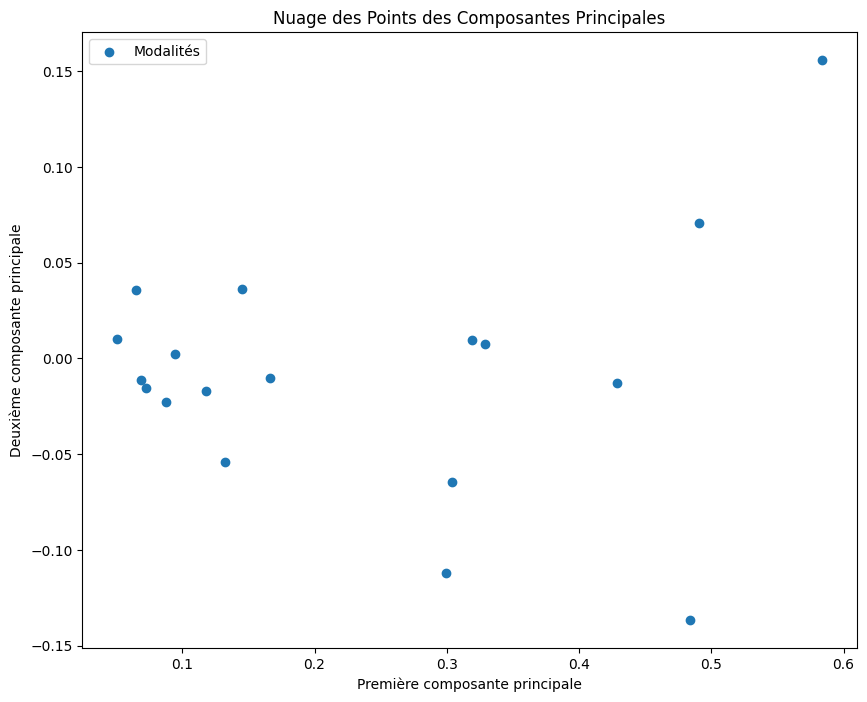

In [35]:
import matplotlib.pyplot as plt

# Supposons que principal_components contient les coordonnées des modalités sur les composantes principales
# Et que row_profile_matrix et col_profile_matrix sont vos matrices de profil ligne et colonne

# Choix des deux premières composantes principales pour la visualisation
x = principal_components[:, 0]
y = principal_components[:, 1]

# Nuage des Points pour les modalités
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Modalités')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Nuage des Points des Composantes Principales')
plt.legend()
plt.show()




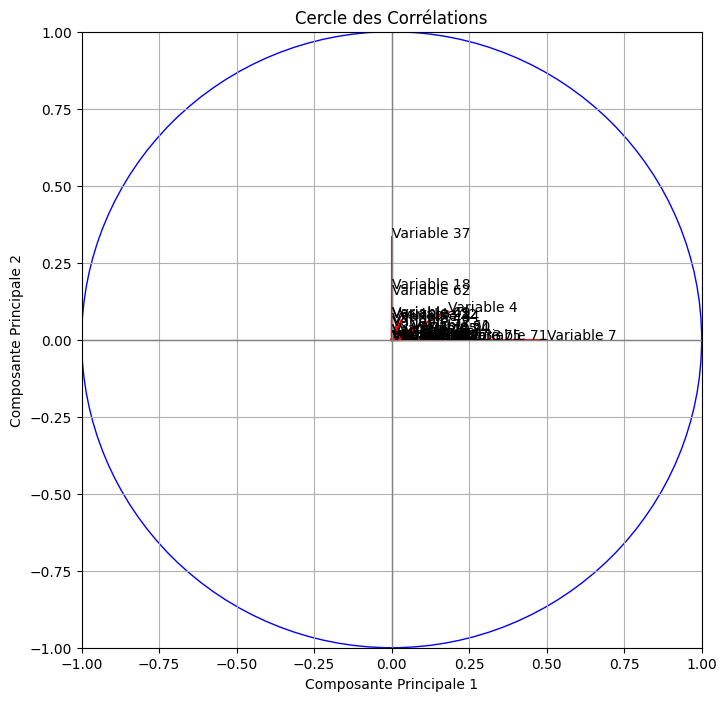

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que row_profile_matrix est votre matrice de profil ligne sous forme de ndarray numpy
# Utiliser la première et la deuxième colonnes pour les coordonnées
variables_coordinates = row_profile_matrix[:, :2]

# Création du graphique
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Placer chaque variable sur le graphique
for i in range(variables_coordinates.shape[0]):
    plt.plot([0, variables_coordinates[i, 0]], [0, variables_coordinates[i, 1]], color='red')
    # Remplacer 'row_profile_matrix.index[i]' par un label approprié si disponible
    plt.text(variables_coordinates[i, 0], variables_coordinates[i, 1], 'Variable ' + str(i))

# Ajouter des axes et des labels
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle des Corrélations')
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


In [45]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2}, p-value: {p}")


Chi2 Stat: 3079.092128187968, p-value: 4.338740996682298e-147
